In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing,

import os

**Exploratory Data Analysis**

In [10]:
import pandas as pd
import numpy as np

In [11]:
data_train = pd.read_csv('./train.csv',header=None)

In [12]:
data_train.columns = ['deceptive','text']

In [13]:
data_train.head(5)

,deceptive,text
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [14]:
data_test = pd.read_csv('./test.csv',header=None)

In [15]:
data_test.columns = ['deceptive','text']

In [16]:
data_test.head(5)

,deceptive,text
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   deceptive  560000 non-null  int64 
 1   text       560000 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.5+ MB


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/m1key/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Deceptive and Non Deceptive reviews (Deceptive=1 & NonDeceptive=2)')

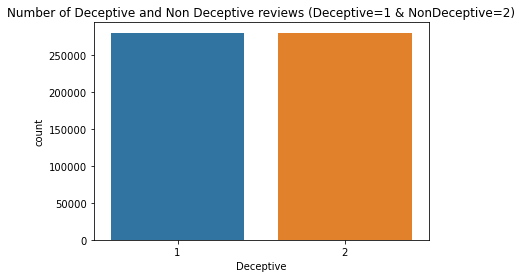

In [19]:
sns.countplot(data_train.deceptive)
plt.xlabel('Deceptive')
plt.title('Number of Deceptive and Non Deceptive reviews (Deceptive=1 & NonDeceptive=2)')

In [20]:
#dataset description
data_train.groupby('deceptive').describe()

text                                                             \
            count  unique                                                top   
deceptive                                                                      
1          280000  280000  The bathrooms were abysmal in the early aftern...   
2          280000  280000  Thrifty's Ice Cream Shoppe is some of the best...   

                
          freq  
deceptive       
1            1  
2            1

In [21]:
#word count
data_train['word_count'] = data_train['text'].apply(lambda x: len(str(x).split(" ")))
data_train[['text','word_count']].head()

,text,word_count
0,"Unfortunately, the frustration of being Dr. Go...",122
1,Been going to Dr. Goldberg for over 10 years. ...,97
2,I don't know what Dr. Goldberg was like before...,212
3,I'm writing this review to give you a heads up...,193
4,All the food is great here. But the best thing...,80


In [22]:
#character count including spaces
data_train['char_count'] = data_train['text'].str.len() ## this also includes spaces
data_train[['text','char_count']].head()

,text,char_count
0,"Unfortunately, the frustration of being Dr. Go...",643
1,Been going to Dr. Goldberg for over 10 years. ...,495
2,I don't know what Dr. Goldberg was like before...,1143
3,I'm writing this review to give you a heads up...,1050
4,All the food is great here. But the best thing...,425


In [23]:
#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data_train['avg_word'] = data_train['text'].apply(lambda x: avg_word(x))
data_train[['text','avg_word']].head()

,text,avg_word
0,"Unfortunately, the frustration of being Dr. Go...",4.539130
1,Been going to Dr. Goldberg for over 10 years. ...,4.113402
2,I don't know what Dr. Goldberg was like before...,4.417062
3,I'm writing this review to give you a heads up...,4.445596
4,All the food is great here. But the best thing...,4.613333


In [24]:
#no of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data_train['stopwords'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_train[['text','stopwords']].head()

,text,stopwords
0,"Unfortunately, the frustration of being Dr. Go...",47
1,Been going to Dr. Goldberg for over 10 years. ...,47
2,I don't know what Dr. Goldberg was like before...,96
3,I'm writing this review to give you a heads up...,79
4,All the food is great here. But the best thing...,21


In [25]:
#no of special characters
data_train['spchar'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data_train[['text','spchar']].head()

,text,spchar
0,"Unfortunately, the frustration of being Dr. Go...",0
1,Been going to Dr. Goldberg for over 10 years. ...,0
2,I don't know what Dr. Goldberg was like before...,0
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,0


In [26]:
#no of numerics
data_train['numerics'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_train[['text','numerics']].head()

,text,numerics
0,"Unfortunately, the frustration of being Dr. Go...",2
1,Been going to Dr. Goldberg for over 10 years. ...,1
2,I don't know what Dr. Goldberg was like before...,1
3,I'm writing this review to give you a heads up...,0
4,All the food is great here. But the best thing...,0


In [27]:
#no of uppercase characters
data_train['upper'] = data_train['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_train[['text','upper']].head()

,text,upper
0,"Unfortunately, the frustration of being Dr. Go...",5
1,Been going to Dr. Goldberg for over 10 years. ...,5
2,I don't know what Dr. Goldberg was like before...,8
3,I'm writing this review to give you a heads up...,10
4,All the food is great here. But the best thing...,1


**Preprocessing**

In [28]:
#to lowercase
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_train['text'].head()

0    unfortunately, the frustration of being dr. go...
1    been going to dr. goldberg for over 10 years. ...
2    i don't know what dr. goldberg was like before...
3    i'm writing this review to give you a heads up...
4    all the food is great here. but the best thing...
Name: text, dtype: object

In [29]:
#removing punctuation
data_train['text'] = data_train['text'].str.replace('[^\w\s]','')
data_train['text'].head()

<ipython-input-29-fe756c47003f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_train['text'] = data_train['text'].str.replace('[^\w\s]','')


0    unfortunately the frustration of being dr gold...
1    been going to dr goldberg for over 10 years i ...
2    i dont know what dr goldberg was like before m...
3    im writing this review to give you a heads up ...
4    all the food is great here but the best thing ...
Name: text, dtype: object

In [30]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think one 1st patie...
2    dont know dr goldberg like moving arizona let ...
3    im writing review give heads see doctor office...
4    food great best thing wings wings simply fanta...
Name: text, dtype: object

In [31]:
#removing common word
freq = pd.Series(' '.join(data_train['text']).split()).value_counts()[:10]
freq

food       319953
place      316445
good       290108
like       259145
get        235863
one        231827
time       209760
would      206953
great      205939
service    202014
dtype: int64

In [32]:
#removing common word
freq = list(freq.index)
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think 1st patients ...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [33]:
#remvoing rare words
freq = pd.Series(' '.join(data_train['text']).split()).value_counts()[-10:]
freq

nightncasual          1
knowsits              1
perfectlynnso         1
clientelenngroupon    1
yearnnsonic           1
streetnalong          1
pu00f9re              1
casualthe             1
onlinenwe             1
etcnoverall           1
dtype: int64

In [34]:
#removing rare words
freq = list(freq.index)
data_train['text'] = data_train['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data_train['text'].head()

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think 1st patients ...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [36]:
#spelling correction
from textblob import TextBlob
data_train['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    unfortunately frustration dr goldbergs patient...
1    going dr goldberg 10 years think st patients s...
2    dont know dr goldberg moving arizona let tell ...
3    in writing review give heads see doctor office...
4    best thing wings wings simply fantastic wet ca...
Name: text, dtype: object

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/m1key/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
#tokenization
TextBlob(data_train['text'][1]).words

WordList(['going', 'dr', 'goldberg', '10', 'years', 'think', '1st', 'patients', 'started', 'mhmg', 'hes', 'years', 'really', 'big', 'picture', 'former', 'gyn', 'dr', 'markoff', 'found', 'fibroids', 'explores', 'options', 'patient', 'understanding', 'doesnt', 'judge', 'asks', 'right', 'questions', 'thorough', 'wants', 'kept', 'loop', 'every', 'aspect', 'medical', 'health', 'life'])

In [41]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data_train['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    unfortun frustrat dr goldberg patient repeat e...
1    go dr goldberg 10 year think 1st patient start...
2    dont know dr goldberg move arizona let tell st...
3    im write review give head see doctor offic sta...
4    best thing wing wing simpli fantast wet cajun ...
Name: text, dtype: object

In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/m1key/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
#lemmetization
from textblob import Word
data_train['text'] = data_train['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_train['text'].head()

0    unfortunately frustration dr goldberg patient ...
1    going dr goldberg 10 year think 1st patient st...
2    dont know dr goldberg moving arizona let tell ...
3    im writing review give head see doctor office ...
4    best thing wing wing simply fantastic wet caju...
Name: text, dtype: object

**Advance Text Processing**

In [45]:
#N-grams
TextBlob(data_train['text'][0]).ngrams(2)

[WordList(['unfortunately', 'frustration']),
 WordList(['frustration', 'dr']),
 WordList(['dr', 'goldberg']),
 WordList(['goldberg', 'patient']),
 WordList(['patient', 'repeat']),
 WordList(['repeat', 'experience']),
 WordList(['experience', 'ive']),
 WordList(['ive', 'many']),
 WordList(['many', 'doctor']),
 WordList(['doctor', 'nyc']),
 WordList(['nyc', 'doctor']),
 WordList(['doctor', 'terrible']),
 WordList(['terrible', 'staff']),
 WordList(['staff', 'seems']),
 WordList(['seems', 'staff']),
 WordList(['staff', 'simply']),
 WordList(['simply', 'never']),
 WordList(['never', 'answer']),
 WordList(['answer', 'phone']),
 WordList(['phone', 'usually']),
 WordList(['usually', 'take']),
 WordList(['take', '2']),
 WordList(['2', 'hour']),
 WordList(['hour', 'repeated']),
 WordList(['repeated', 'calling']),
 WordList(['calling', 'answer']),
 WordList(['answer', 'want']),
 WordList(['want', 'deal']),
 WordList(['deal', 'run']),
 WordList(['run', 'problem']),
 WordList(['problem', 'many']),


In [46]:
#Term frequency
tf1 = (data_train['text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,patient,2
1,dr,2
2,year,2
3,former,1
4,aspect,1
5,option,1
6,he,1
7,question,1
8,going,1
9,markoff,1


In [47]:
#inverse document frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data_train.shape[0]/(len(data_train[data_train['text'].str.contains(word)])))

tf1

,words,tf,idf
0,patient,2,4.511322
1,dr,2,1.218428
2,year,2,2.425459
3,former,1,5.205283
4,aspect,1,5.871779
5,option,1,3.140345
6,he,1,0.365561
7,question,1,3.767768
8,going,1,2.029686
9,markoff,1,12.137080


In [48]:
#term freq - inverse document freq
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,patient,2,4.511322,9.022644
1,dr,2,1.218428,2.436856
2,year,2,2.425459,4.850918
3,former,1,5.205283,5.205283
4,aspect,1,5.871779,5.871779
5,option,1,3.140345,3.140345
6,he,1,0.365561,0.365561
7,question,1,3.767768,3.767768
8,going,1,2.029686,2.029686
9,markoff,1,12.137080,12.137080


In [49]:
#sparse matrix tf-idf freq
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(data_train['text'])

train_vect

<560000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 16479223 stored elements in Compressed Sparse Row format>

In [50]:
#Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(data_train['text'])
train_bow

<560000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 19312429 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
data_train.head(10)

,deceptive,text,word_count,char_count,avg_word,stopwords,spchar,numerics,upper
0,1,unfortunately frustration dr goldberg patient ...,122,643,4.539130,47,0,2,5
1,2,going dr goldberg 10 year think 1st patient st...,97,495,4.113402,47,0,1,5
2,1,dont know dr goldberg moving arizona let tell ...,212,1143,4.417062,96,0,1,8
3,1,im writing review give head see doctor office ...,193,1050,4.445596,79,0,0,10
4,2,best thing wing wing simply fantastic wet caju...,80,425,4.613333,21,0,0,1
5,1,wing sauce water pretty much lot butter hot sa...,62,307,4.100000,22,0,0,0
6,1,owning driving range inside city limit license...,234,1143,4.193548,88,0,1,5
7,1,absolute garbage half tee available including ...,115,563,4.157407,50,0,1,1
8,2,finally made range heard thing people fine go ...,187,939,4.026738,88,0,0,6
9,2,drove yesterday sneak peak reopens july 14th c...,78,370,4.013699,23,0,0,2


In [53]:
x.head()

NameError: name 'x' is not defined

In [ ]:
y.head()

In [54]:
x = data_train['text'].astype(str)
y = data_train['deceptive']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [56]:
x_train.head()

100962    negative review slow play course time slow dow...
502466    truffle fry win know feel hit jackpot vega try...
272300    largest forever21 ive ever seennnthey much stu...
543152    big u00e0 leur poutine glacu00e9e u00e9nooooor...
559480    first experience midweek return visit disappoi...
Name: text, dtype: object

In [57]:
y_train.head()

100962    1
502466    2
272300    2
543152    2
559480    1
Name: deceptive, dtype: int64

In [58]:
x_test.head()

52087     september 6 2013norder go roll ahead busy satu...
212502    place really wanted love truly looking forward...
115816                     way better excepted kid fun free
330676    want guy badly always really creative cupcake ...
400425    nice atmosphere interesting wine selection som...
Name: text, dtype: object

In [59]:
y_test.head()

52087     2
212502    1
115816    2
330676    1
400425    2
Name: deceptive, dtype: int64

In [60]:
x_train.shape

(420000,)

In [61]:
x_test.shape

(140000,)

In [62]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [63]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [64]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_test)
sequences_test = tok.texts_to_sequences(x_test)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [65]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)
tokenizer.fit_on_texts(x_train)

In [66]:
tokenizer.fit_on_texts(x_test)

In [67]:
x_train1 = tokenizer.texts_to_sequences(x_train)

In [68]:
x_test1=tokenizer.texts_to_sequences(x_test)

In [69]:
word_index = tokenizer.word_index

In [70]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in x_train)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in x_train])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in x_train])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 728528
Longest comment size: 4481
Average comment size: 423.33225238095235
Stdev of comment size: 395.7559345207035
Max comment size: 1610


In [71]:
from keras.preprocessing.sequence import pad_sequences

In [72]:
processed_x_train = pad_sequences(x_train1, maxlen=max_len, padding='post', truncating='post')
processed_x_test = pad_sequences(x_test1, maxlen=max_len, padding='post', truncating='post')

In [73]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop,Nadam
from keras.callbacks import EarlyStopping

In [74]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [75]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1610)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1610, 50)          50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
model.fit(processed_x_train,y_train,batch_size=128,epochs=10,
          validation_data=(processed_x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
from keras.layers import CuDNNGRU, Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional

Embeddings ------- GloVe 100D ------

In [ ]:
embeddings_index = {}
f = open(os.path.join('../input/glove-global-vectors-for-word-representation', 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [ ]:
## create model
model_glove = Sequential()
model_glove.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))
model_glove.add(Dropout(0.2))
model_glove.add(Conv1D(64, 5, activation='relu'))
model_glove.add(MaxPooling1D(pool_size=4))
model_glove.add(LSTM(100))
model_glove.add(Dense(1, activation='sigmoid'))
#model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_glove.summary()
model_glove.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_glove.fit(processed_x_train,y_train,batch_size=128,epochs=10,
          validation_data=(processed_x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

LSTM Embeddings

In [ ]:
# Initate model
model3 = Sequential()

# Add Embedding layer
model3.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))

# Add Recurrent layer
#model.add(Bidirectional(CuDNNGRU(300, return_sequences=True)))
model3.add(LSTM(60, return_sequences=True, name='lstm_layer'))
model3.add(LSTM(30, return_sequences=True, name='lstm_layer2'))
model3.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model3.add(MaxPooling1D(3))
model3.add(GlobalMaxPooling1D())
model3.add(BatchNormalization())

# Add fully connected layers
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))

# Summarize the model
model3.summary()

**CNN GloVe Model 2**

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32') <br>
embedded_sequences = embedding_layer(sequence_input)<br>
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)<br>
l_pool1 = MaxPooling1D(5)(l_cov1)<br>
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)<br>
l_pool2 = MaxPooling1D(5)(l_cov2)<br>
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)<br>
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling<br>
l_flat = Flatten()(l_pool3)<br>
l_dense = Dense(128, activation='relu')(l_flat)<br>
preds = Dense(2, activation='softmax')<br>